<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/advanced/Lab05_wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyWavelets

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data

# Load image
original = pywt.data.camera()
original.shape

(512, 512)

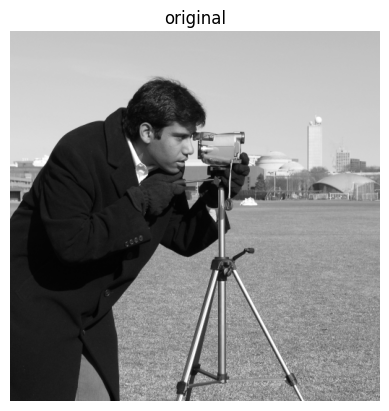

In [3]:
plt.imshow(original,cmap='gray')
plt.axis('off')
plt.title('original')
plt.show()

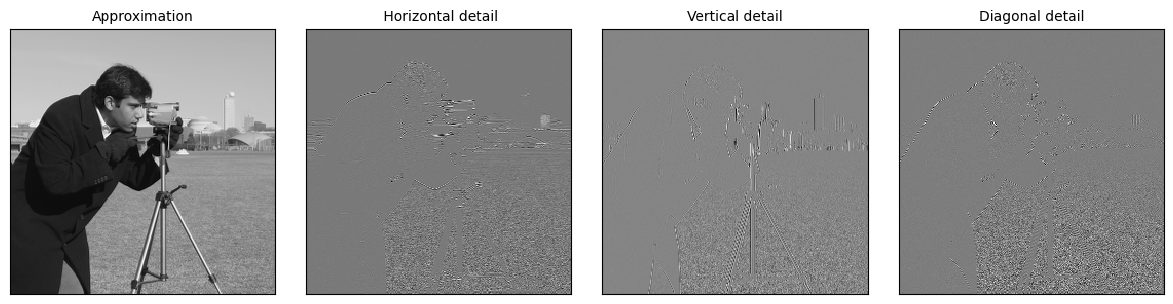

In [4]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'db4')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

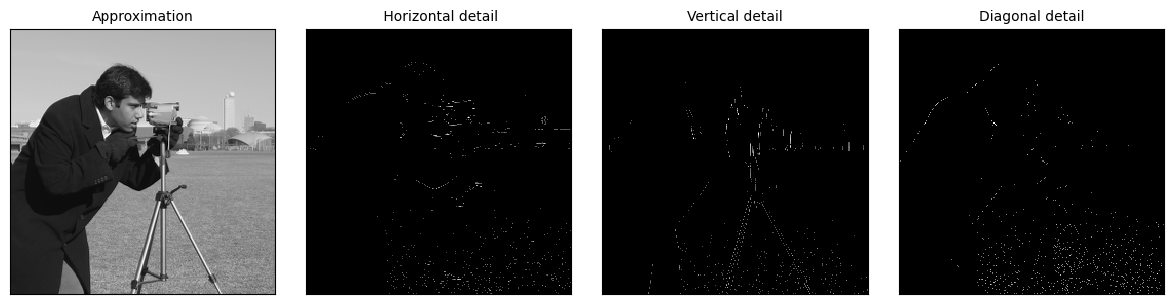

In [5]:
LH[LH<np.percentile(LH,99)]=0
HL[HL<np.percentile(HL,99)]=0
HH[HH<np.percentile(HH,99)]=0

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


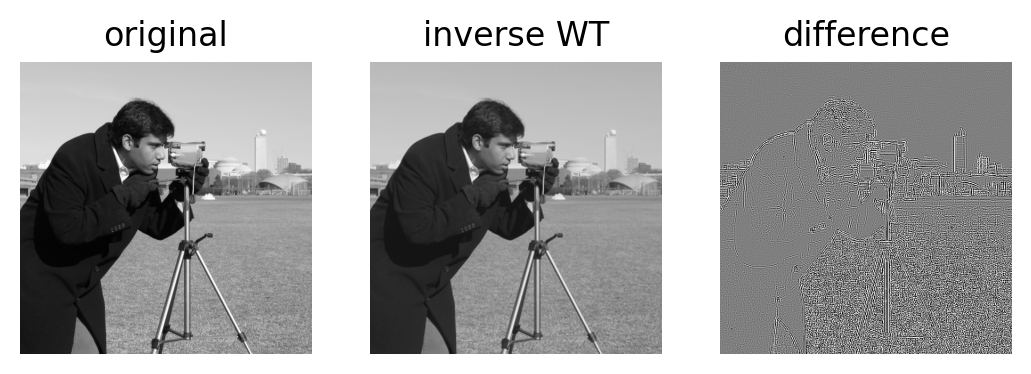

In [7]:
reconimg = pywt.idwt2([LL,(LH,HL,HH)],'db4')

plt.figure(dpi=200)
plt.subplot(131)
plt.imshow(original,cmap='gray')
plt.axis('off')
plt.title('original')
plt.subplot(132)
plt.imshow(reconimg,cmap='gray')
plt.axis('off')
plt.title('inverse WT')
plt.subplot(133)
plt.imshow(original-reconimg,cmap='gray',vmin=-5,vmax=5)
plt.axis('off')
plt.title('difference')
plt.show()